# Fraud Detection with Isolation Forest
This notebook demonstrates how to use the Isolation Forest algorithm to detect fraudulent transactions in a synthetic dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./synthetic_fraud_detection.csv')
df.head()

,transaction_id,amount,transaction_time,location,is_fraud
0,1,52.34,2025-07-01 08:15:23,New York,0
1,2,23.45,2025-07-01 09:12:11,Los Angeles,0
2,3,75.12,2025-07-01 10:45:09,Chicago,0
3,4,18.90,2025-07-01 11:30:45,Houston,0
4,5,120.00,2025-07-01 12:05:33,Phoenix,0


## Data Overview
Let's check the distribution of transaction amounts and the number of frauds.

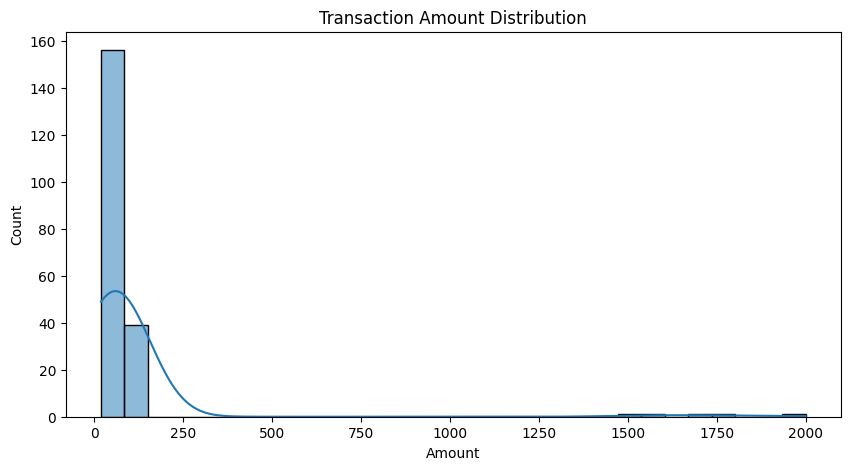

is_fraud
0    195
1      5
Name: count, dtype: int64


In [3]:
# Visualize transaction amount distribution
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Count of fraud vs non-fraud
print(df['is_fraud'].value_counts())

## Prepare Data for Isolation Forest
We will use only numerical features for anomaly detection.

In [4]:
# Select features
features = ['amount']
X = df[features]

In [5]:
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)
# anomaly_score: -1 means anomaly, 1 means normal
df['predicted_fraud'] = (df['anomaly_score'] == -1).astype(int)
df[['amount', 'is_fraud', 'predicted_fraud']].head(10)

,amount,is_fraud,predicted_fraud
0,52.34,0,0
1,23.45,0,0
2,75.12,0,0
3,18.90,0,1
4,120.00,0,0
5,45.67,0,0
6,33.21,0,0
7,67.89,0,0
8,29.99,0,0
9,88.76,0,0


## Evaluation
Let's see how well the Isolation Forest detected the fraudulent transactions.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df['is_fraud'], df['predicted_fraud']))
print(classification_report(df['is_fraud'], df['predicted_fraud']))

[[191   4]
 [  0   5]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       195
           1       0.56      1.00      0.71         5

    accuracy                           0.98       200
   macro avg       0.78      0.99      0.85       200
weighted avg       0.99      0.98      0.98       200



## Visualize Detected Anomalies
Plot the transaction amounts, highlighting detected anomalies.

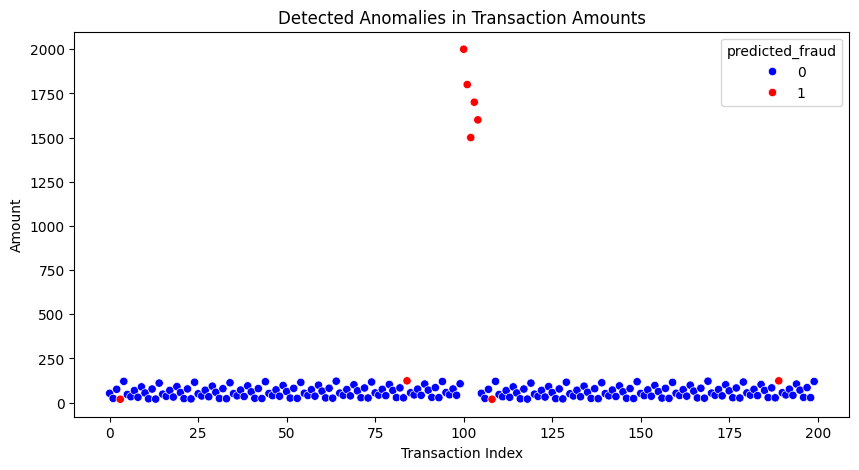

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(len(df)), y='amount', hue='predicted_fraud', data=df, palette=['blue','red'])
plt.title('Detected Anomalies in Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.show()